# Transcriptom classifier

In this notebook, I try to build a simple transcriptome classifier using TensorFlow. The data is a table consisting of gene expression levels (10000 genes) of multiple samples (1000 samples). 

We will define the feature of the disease as the 9482th gene level is greater than 0.9. We use this to generate labels for the training data, and to test the trained model. 

## 0 Packages

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, regularizers

## 1 Data preparation

array([240, 587, 346, 417, 681, 407, 492, 684, 937, 337, 757, 468, 530,
       386, 261,  57, 401, 176, 529, 157, 788, 274, 656, 873, 763,  32,
       375, 527, 713, 363, 232, 545, 722, 720, 913, 605, 421, 199, 893,
       216, 813, 335,  66, 462, 910, 764, 999, 189, 950, 561, 103, 181,
       458,   9, 915, 139, 182, 740, 590, 574, 826, 445, 981, 635, 822,
       789, 118, 564, 808,  13, 281, 801, 357, 547, 821, 733, 983,  84,
       354, 572, 664, 934, 723, 434, 144, 145, 499, 892, 593, 655, 716,
       608, 175, 551, 283, 391, 154, 180, 973, 444])

In [147]:
# generate random matrix
M, N = 1000, 10000
data = np.random.rand(M, N)
# replace some rows with sine waves, label them as 1
label = np.zeros(M)
ind = np.random.choice(M, size=100, replace=False)
label[ind] = 1
data[ind, :] = np.sin(np.linspace(0, 10, N))

In [148]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

## 2 Train a neural network

Here, we implement a feedforward neural network as the classifier. 

In [149]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1], )),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

c:\Users\zl948\AppData\Local\miniconda3\envs\py39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [150]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [151]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8189 - loss: 0.7395 - val_accuracy: 1.0000 - val_loss: 0.4197
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.3986 - val_accuracy: 1.0000 - val_loss: 0.3383
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.3207 - val_accuracy: 1.0000 - val_loss: 0.2713
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2572 - val_accuracy: 1.0000 - val_loss: 0.2177
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2064 - val_accuracy: 1.0000 - val_loss: 0.1752
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.1663 - val_accuracy: 1.0000 - val_loss: 0.1417
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.1348 - val_accuracy: 1.0000 - val_loss: 0.1154
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1099 - val_accuracy: 1.0000 - v

The first training was apparently not great. The accuracy does not steadily increase with the Epochs. The loss remains relatively large. This is just bare observation. Quantitative evaluation of the trained model is needed. 

We can use `model.evaluate`. It gives a loss and an accuracy.

In [156]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.2096e-04 
Test accuracy: 100.00%


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 100.00%


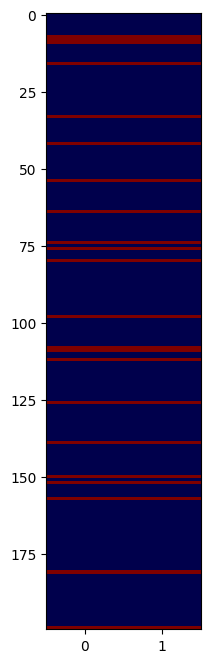

In [162]:
plt.figure(figsize=(2, 8))
result = model.predict(np.array(X_test[:, :])) >= 0.5
plt.imshow(np.stack([y_test.squeeze(), result.squeeze()], axis=1), cmap="seismic", aspect="auto")
acc = check.mean()
print(f"Accuracy: {acc * 100:.2f}%")

In [ ]:
for i in range(10):
    

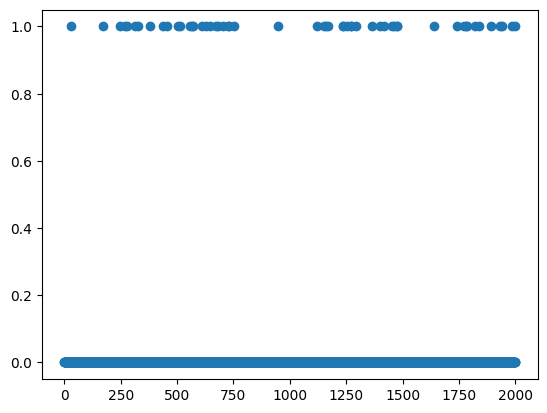

In [132]:
plt.scatter(np.arange(len(result)), result)
# plt.scatter(np.arange(len(result)), y_test)

Among those true in the test set (sample with disease), how many are captured by the model (prediction==True)?

In [141]:
result_df.loc[result_df["test"]==1].astype(bool).values.shape

(223, 2)

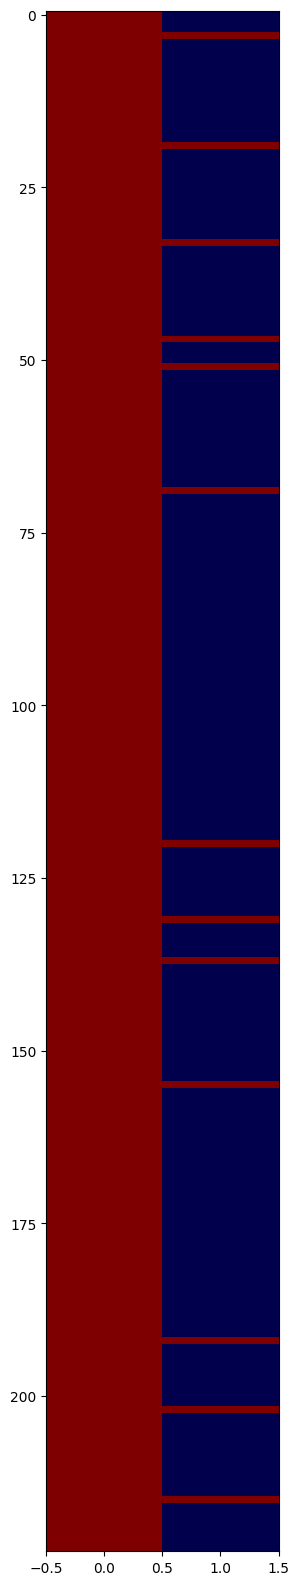

In [142]:
plt.figure(figsize=(3, 20))
result_df = pd.DataFrame({"test": y_test.squeeze(), "pred": result.squeeze()})
plt.imshow(result_df.loc[result_df["test"]==1].astype(bool).values, aspect='auto', cmap="seismic")

In the graph, red is True and blue is False. The first column is the test label and the second column is the predicted result. We can see that most of the disease samples are not captured, although the evaluation of the whole test set gives ~90% accuracy. This highlights the insufficiency of using accuracy as the only metric of a model.

In [143]:
numTrueSamples = len(result_df.loc[result_df["test"]==1])
numCaptured = len(result_df.loc[(result_df["test"]==1)&(result_df["pred"]==True)])
print(f"Captured: {numCaptured}/{numTrueSamples}, Capture rate: {numCaptured/numTrueSamples:.2f}")

Captured: 13/223, Capture rate: 0.06


This metric is called "Recall", formally defined as the fraction of true positive predictions among actual positives.

There are other nominal metrics for a ML model:

- Precision: Fraction of true positive predictions among predicted positives;
- F1-Score: Harmonic mean of precision and recall;
- AUC (Area Under Curve): Measures the ability to distinguish between classes.